In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import BeamSection module from FlightBEND
from flightbend import BeamSection

## Elliptical section
---

In [2]:
# Import mesh: Ratio a/b = 5; Element type Q9; Mesh with 196 elements
from meshes.a5.Q9.elipse_a5_Q9_196e    import malha as mesh

## Unpack mesh data
# Node coordinates
secNodes    = mesh['coordinates']
# Connectivity (subtract 1 so that the first element has index 0)
secElems    = mesh['elements'] -1
# Material properties
secYoung    = mesh['young']     # Elastic modulus
secNu       = mesh['poiss']     # Poisson's ratio
secRho      = 1.0               # Density set to 1

# Instancing beam section object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

# Twist rate
rate = 1

# Shear center and centroid positions
areaProps = sec.getAreaProperties()
Y_CT = areaProps['Y_CT']
Z_CT = areaProps['Z_CT']

Y_CG = areaProps['Y_CG_w']
Z_CG = areaProps['Z_CG_w']

print(f'{ Y_CT = :.4e}, { Z_CT = :.4e}')
print(f'{ Y_CG = :.4e}, { Z_CG = :.4e}')
print('')
print(f'Nodes per element:      {len(  secElems[0,:]): 4d}')
print(f'Number of elements:     {len(  secElems[:,0]): 4d}')
print(f'Number of nodes:        {len(  secNodes[:,0]): 4d}')
print(f'Max. warping:           {np.max(sec.displacements*rate): 5f} mm')
print(f'Min. warping:           {np.min(sec.displacements*rate): 5f} mm')
print(f'Quadrature degreee:     {sec.intDegree : 4d}')

Area properties integration time:    0.255 seconds
Global stiffness assembly time:      0.974 seconds
System solve time:                   0.003 seconds
Shear center integration time:       0.447 seconds
Torsional constant integration time: 0.421 seconds
 Y_CT = 2.9996e-07,  Z_CT = -9.9669e-08
 Y_CG = 9.1120e-07,  Z_CG = 1.2853e-07

Nodes per element:         9
Number of elements:      196
Number of nodes:         841
Max. warping:            2.303600 mm
Min. warping:           -2.303604 mm
Quadrature degreee:        4


(-4.99997, 4.99997, -1.0, 1.0)

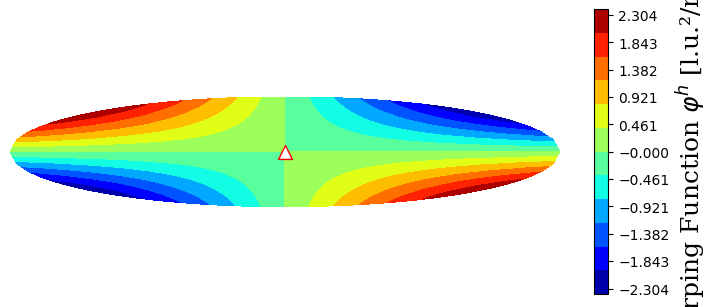

In [3]:
fig, ax = sec.plotWarping(levels=12, showMesh=False, showCG=False, 
                          fig_num=2, unit='mm', vmax=2.4, vmin=-2.4, 
                          figsize=(8,6),
                          cbarKwargs=dict(shrink=.5))
ax.get_legend().remove()
ax.axis('off')

#### Analytical solution

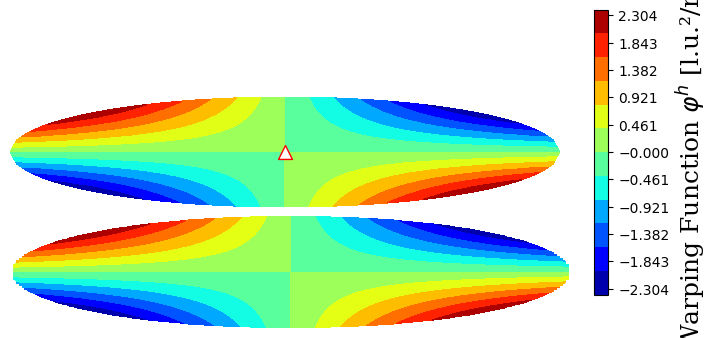

In [4]:
# Create new axis in the warping figure 
ax2 = fig.add_subplot(2,1,2, position=(0.10,0.1,0.7,0.4))

##  ============================================================  ##
##                             INPUTS                             ##
##  ============================================================  ##
T  = 1                                 # External torque    [kN*mm]
a  = 5                                 # Semimajor axis     [mm]
b  = 1                                 # Semiminor axis     [mm]
mu = 1                                 # Shear modulus      [Gpa, kN/mm]
pts = 200                              # Number of points for grid


##  ============================================================  ##
##                           PROCESSING                           ##
##  ============================================================  ##
# Twist rate per length
alpha = T*(a**2+b**2)/(np.pi*a**3*b**3)

# Lattice points 
X = np.linspace(-a, a, pts)
Y = np.linspace(-b, b, pts)
xx, yy = np.meshgrid(X,Y)  

# Mask points outside ellipse
mask = (yy/b)**2 + (xx/a)**2 > 1  
gridX = np.ma.array(xx, mask=mask)
gridY = np.ma.array(yy, mask=mask)


##  ============================================================  ##
##                          WARPING FUNCTION                      ##
##  ============================================================  ##
w   = lambda x,y: T*(b**2-a**2)/(mu*np.pi*a**3*b**3)*x*y # Sadd



##  ============================================================  ##
##                           PLOTTING                             ##
##  ============================================================  ##
phis = w(gridX,gridY)/alpha

# Clamping max and minimum values
vmin, vmax  = -2.4,2.4 #np.min(phis), np.max(phis)
im          = ax2.contourf(X,Y,phis, levels=12,cmap='jet', vmax=vmax, vmin=vmin) 

# Make ax2 equal scale 
ax2.axis('square'); 
ax2.set_ylim([-1,1])

# Delete axis frame
ax.axis('off')
ax2.axis('off')

# Display figure
plt.figure(fig)


## Circular section
---

In [5]:

# Import mesh: Ratio a/b = 1; Element type Q9; Mesh with 196 elements
from meshes.a1.Q9.elipse_a1_Q9_196e    import malha as mesh

In [6]:
## Unpacking mesh data
# Node coordinates
secNodes    = np.hstack([ np.ones(mesh['coordinates'].shape[0]).reshape(-1,1), mesh['coordinates']])
# Connectivity (subtract 1 so that the first element has index 0)
secElems    = mesh['elements']-1
# Material properties
secYoung    = mesh['young'] * np.ones(secElems.shape[0]).reshape(-1,1)  # Elastic modulus
secNu       = mesh['poiss'] * np.ones(secElems.shape[0]).reshape(-1,1)  # Poisson's ratio
secRho      = np.ones(secElems.shape[0]).reshape(-1,1)                  # Density set to 1

# Instancing beam section object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

# Twist rate
rate = 1

# Shear center and centroid positions
areaProps = sec.getAreaProperties()
Y_CT = areaProps['Y_CT']
Z_CT = areaProps['Z_CT']

Y_CG = areaProps['Y_CG_w']
Z_CG = areaProps['Z_CG_w']

print('')
print(f'{Y_CT = :.4e}, { Z_CT = :.4e}')
print(f'{Y_CG = :.4e}, { Z_CG = :.4e}')
print('')
print(f'Nodes per element:      {len(  secElems[0,:]): 12d}')
print(f'Number of elements:     {len(  secElems[:,0]): 12d}')
print(f'Number of nodes:        {len(  secNodes[:,0]): 12d}')
print(f'Max. warping:           {np.max(sec.displacements*rate): 12.5f} mm')
print(f'Min. warping:           {np.min(sec.displacements*rate): 12.5f} mm')
print(f'Quadrature degreee:     {sec.intDegree : 12d}')

Area properties integration time:    0.172 seconds
Global stiffness assembly time:      0.460 seconds
System solve time:                   0.003 seconds
Shear center integration time:       0.239 seconds
Torsional constant integration time: 0.210 seconds

Y_CT = -3.1955e-07,  Z_CT = -3.4615e-13
Y_CG = -3.1934e-07,  Z_CG = -2.7499e-10

Nodes per element:                 9
Number of elements:              196
Number of nodes:                 841
Max. warping:                0.00000 mm
Min. warping:               -0.00000 mm
Quadrature degreee:                4


(-1.0, 1.0, -1.0, 1.0)

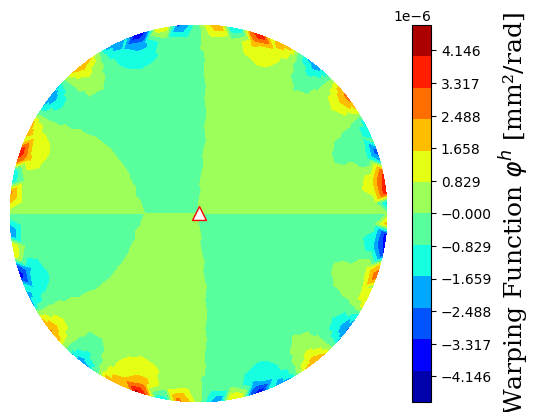

In [8]:
plt.close(fig)

# Plot warping displacement
fig3, ax3 = sec.plotWarping(levels=12, showMesh=False, showCG=False, lengthUnits='mm')
ax3.get_legend().remove()
ax3.axis('off')